In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

from numerical_methods.bisection import bisection
from numerical_methods.false_position import false_posittion
from numerical_methods.newton_raphson import newton_raphson
from numerical_methods.secant import secant

# Exercício 1

In [2]:
def f(x):
    return np.tan(np.pi * x) - 6


x0 = 0
x1 = 0.48
true_root = np.atan(6) / np.pi

bisec = bisection(f, x0, x1, max_iterations=10)
fp = false_posittion(f, x0, x1, max_iterations=10)
sec = secant(f, x0, x1, max_iterations=10)

print(
    tabulate(
        [
            ["method", "result", "error", "steps"],
            ["bisection", bisec.result, bisec.relative_error(true_root), len(bisec)],
            ["false position", fp.result, fp.relative_error(true_root), len(fp)],
            ["secant", sec.result, sec.relative_error(true_root), len(sec)],
        ],
        headers="firstrow",
        tablefmt="fancy_grid",
        floatfmt=("", ".4f", ".4%"),
    )
)

╒════════════════╤═══════════╤══════════════╤═════════╕
│ method         │    result │        error │   steps │
╞════════════════╪═══════════╪══════════════╪═════════╡
│ bisection      │    0.4476 │      0.0376% │      10 │
├────────────────┼───────────┼──────────────┼─────────┤
│ false position │    0.4440 │      0.7669% │      10 │
├────────────────┼───────────┼──────────────┼─────────┤
│ secant         │ 4233.4575 │ 946068.7634% │      10 │
╘════════════════╧═══════════╧══════════════╧═════════╛


## Conclusão

- O método da bissecção é o mais eficiente, com o menor erro relativo percentual.
- O método da falsa posição também converge, mas com menor precisão.
- O método da secante diverge neste caso específico.


# Exercício 2

╒════════════════╤═══════════╤═════════════════╤═══════════╤════════════════╕
│ method         │   (-1, 0) │   (-1, 0) steps │    (0, 1) │   (0, 1) steps │
╞════════════════╪═══════════╪═════════════════╪═══════════╪════════════════╡
│ false position │ -0.040659 │              24 │  0.962398 │             10 │
├────────────────┼───────────┼─────────────────┼───────────┼────────────────┤
│ secant         │ -0.040659 │               6 │ -0.040659 │             13 │
├────────────────┼───────────┼─────────────────┼───────────┼────────────────┤
│ newton raphson │ -0.040659 │               5 │ -0.040659 │              6 │
╘════════════════╧═══════════╧═════════════════╧═══════════╧════════════════╛


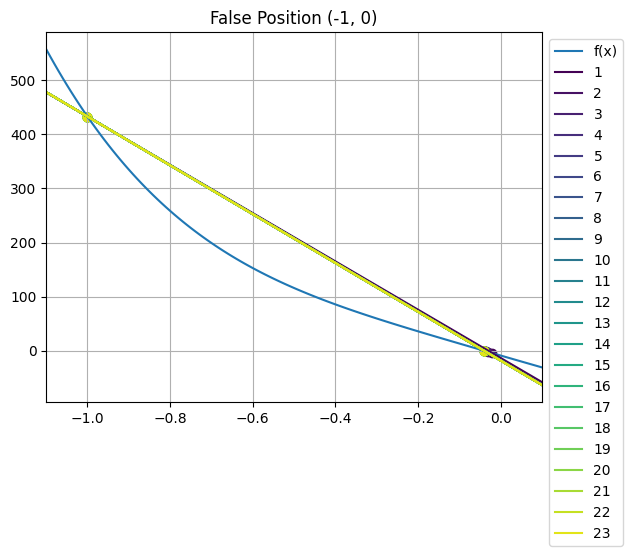

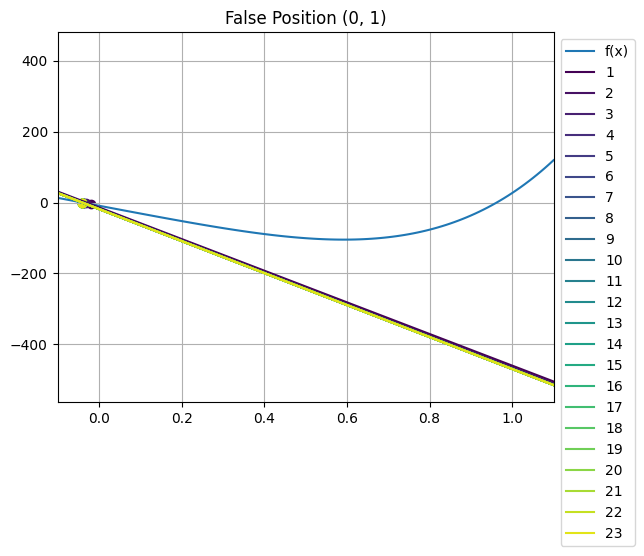

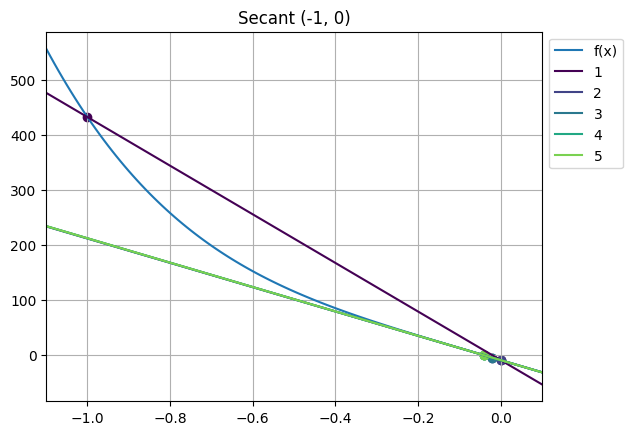

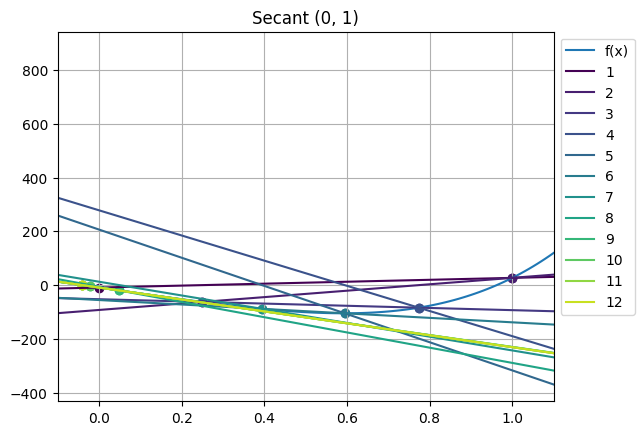

In [3]:
def f(x):
    return 230 * x**4 + 18 * x**3 + 9 * x**2 - 221 * x - 9


def fd(x):
    return 920 * x**3 + 54 * x**2 + 18 * x - 221


true_roots = [-0.040218, 0.96178]
interval1 = (-1, 0)
interval2 = (0, 1)
tolerance = 1e-6
max_iterations = 50
precision = 10


# false position
fp_i1 = false_posittion(f, *interval1, tolerance=tolerance, max_iterations=max_iterations, precision=precision)
fp_i2 = false_posittion(f, *interval2, tolerance=tolerance, max_iterations=max_iterations, precision=precision)
fp_i1.plot(bounds=interval1)
plt.title(f"False Position {interval1}")
fp_i1.plot(bounds=interval2)
plt.title(f"False Position {interval2}")

# secant
sec_e1 = secant(f, *interval1, tolerance=tolerance, max_iterations=max_iterations, precision=precision)
sec_e2 = secant(f, *interval2, tolerance=tolerance, max_iterations=max_iterations, precision=precision)
sec_e1.plot(bounds=interval1)
plt.title(f"Secant {interval1}")
sec_e2.plot(bounds=interval2)
plt.title(f"Secant {interval2}")

# newton raphson
nr_e1 = newton_raphson(
    f, fd, np.mean(interval1), tolerance=tolerance, max_iterations=max_iterations, precision=precision
)
nr_e2 = newton_raphson(
    f, fd, np.mean(interval2), tolerance=tolerance, max_iterations=max_iterations, precision=precision
)

print(
    tabulate(
        [
            ["method", interval1, f"{interval1} steps", interval2, f"{interval2} steps"],
            ["false position", fp_i1.result, len(fp_i1), fp_i2.result, len(fp_i2)],
            ["secant", sec_e1.result, len(sec_e1), sec_e2.result, len(sec_e2)],
            ["newton raphson", nr_e1.result, len(nr_e1), nr_e2.result, len(nr_e2)],
        ],
        headers="firstrow",
        tablefmt="fancy_grid",
        floatfmt=("", ".6f", "", ".6f", ""),
    )
)

d. Comparação Gráfica entre Falsa Posição e Secante:

A análise gráfica evidencia a diferença de comportamento entre a Falsa Posição e a Secante, com a primeira apresentando uma convergência mais linear e a segunda oscilando mais antes de convergir.

No intervalo 2, o método da Secante converge para a raiz do intervalo 1, indicando que a escolha dos pontos iniciais pode influenciar significativamente sua convergência.

Conclusão:

- O método de Newton-Raphson foi o mais eficiente em ambos os intervalos, convergindo com o menor número de iterações.
- A Falsa Posição e a Secante também encontraram as raízes, mas a Secante se mostrou menos confiável, convergindo para a raiz errada no intervalo 2.

# Exercício 3

         a       b       x       f(a)     f(b)       f(x)
--  ------  ------  ------  ---------  -------  ---------
 0  0.0000  1.0000  0.5000    -9.0000  27.0000  -100.6250
 1  0.5000  1.0000  0.7500  -100.6250  27.0000   -89.3203
 2  0.7500  1.0000  0.8750   -89.3203  27.0000   -48.6040
 3  0.8750  1.0000  0.9375   -48.6040  27.0000   -15.7762
 4  0.9375  1.0000  0.9687   -15.7762  27.0000     4.2528
 5  0.9375  0.9687  0.9531   -15.7762   4.2528    -6.0815
 6  0.9531  0.9687  0.9609    -6.0815   4.2528    -0.9955
 7  0.9609  0.9687  0.9648    -0.9955   4.2528     1.6081
 8  0.9609  0.9648  0.9628    -0.9955   1.6081     0.2678
 9  0.9609  0.9628  0.9618    -0.9955   0.2678    -0.3983
10  0.9618  0.9628  0.9623    -0.3983   0.2678    -0.0655
11  0.9623  0.9628  0.9625    -0.0655   0.2678     0.0677
12  0.9623  0.9625  0.9624    -0.0655   0.0677     0.0010


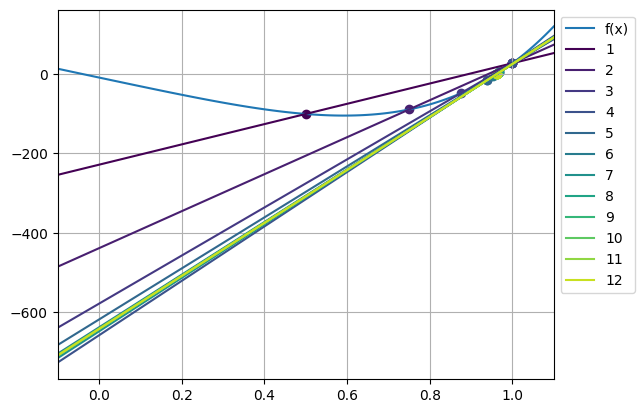

In [4]:
length = 10
radius = 1
tolerance = 0.01


def volume(height, length, radius):
    return length * (
        (0.5 * np.pi * radius**2) - (radius**2 * np.asin(height / radius)) - (height * (radius**2 - height**2) ** 0.5)
    )


trail = bisection(f, 0, radius, tolerance=tolerance)
print(trail)
trail.plot()

Profundidade da água: 0.96 pés